# Travel Insurance

-----
## Latar Belakang

Dalam beberapa tahun terakhir, penggunaan travel insurance telah meningkat secara signifikan. Hal ini disebabkan oleh kesadaran akan risiko yang terkait dengan perjalanan, seperti pembatalan perjalanan, kehilangan bagasi, kecelakaan, atau keadaan darurat medis saat berada di luar negeri. Travel insurance memberikan perlindungan finansial bagi pelancong dalam menghadapi risiko-risiko ini.

Namun, bagi perusahaan asuransi, manajemen klaim travel insurance bisa menjadi proses yang rumit. Data yang dihasilkan dari klaim-klaim sebelumnya dapat memberikan wawasan berharga, namun memproses data ini secara manual sangatlah tidak efisien dan rentan terhadap kesalahan.

Oleh karena itu, perusahaan asuransi semakin beralih ke teknologi machine learning untuk membantu dalam menganalisis data klaim travel insurance.

-----
## Pemahaman Bisnis


Asuransi adalah suatu bentuk perjanjian yang melibatkan pihak tertanggung (pemegang polis) dengan pihak penanggung (perusahaan asuransi). Dalam perjanjian ini, pihak tertanggung membayar premi secara teratur kepada perusahaan asuransi. Sebagai imbalan, perusahaan asuransi berjanji untuk memberikan kompensasi atau perlindungan keuangan kepada pihak tertanggung jika terjadi suatu kejadian yang tidak diinginkan yang tercakup dalam polis asuransi.

Komponen Utama Asuransi:
1. Tertanggung (Pemegang Polis):  
Merupakan individu atau organisasi yang membeli polis asuransi untuk mendapatkan perlindungan.

2. Penanggung (Perusahaan Asuransi):  
Merupakan perusahaan atau lembaga yang menyediakan perlindungan atau kompensasi finansial kepada pihak tertanggung sesuai dengan syarat-syarat yang telah disepakati dalam polis.

3. Premi:  
Premi adalah jumlah uang yang harus dibayar oleh pihak tertanggung kepada perusahaan asuransi. Premi ini biasanya dibayarkan secara berkala (bulanan, tahunan, dll.) dan besarnya tergantung pada berbagai faktor, seperti jenis asuransi, risiko yang tercakup, usia tertanggung, dan sebagainya.

4. Polis:  
Polis adalah dokumen yang memuat rincian mengenai cakupan asuransi, premi yang harus dibayarkan, masa berlaku asuransi, kondisi, dan ketentuan lainnya yang berlaku dalam perjanjian asuransi.

Dalam hal Travel insurance hal yang biasanya diproteksi oleh pihak asuransi adalah:  
1. Pembatalan Perjalanan:
Mengganti biaya tiket perjalanan yang telah dibayar jika perjalanan harus dibatalkan karena alasan yang ditetapkan dalam polis, seperti sakit, kecelakaan, atau keadaan darurat lainnya.

2. Keterlambatan Penerbangan:
Memberikan kompensasi untuk biaya tambahan yang terjadi karena keterlambatan penerbangan yang signifikan, seperti biaya penginapan tambahan, biaya transportasi alternatif, atau biaya lainnya.

3. Hilangnya atau Kerusakan Bagasi:
Mengganti nilai barang-barang pribadi yang hilang atau rusak selama perjalanan, seperti pakaian, barang elektronik, atau perlengkapan lainnya.

4. Asuransi Medis Darurat:
Menyediakan perlindungan medis selama perjalanan, termasuk biaya perawatan medis, biaya rawat inap di rumah sakit, biaya obat-obatan, bahkan repatriasi medis jika diperlukan.

5. Tanggung Jawab Hukum:
Melindungi wisatawan dari klaim hukum yang mungkin timbul akibat kecelakaan atau tindakan yang terjadi selama perjalanan.

6. Bantuan Perjalanan 24 Jam:
Memberikan akses ke layanan bantuan darurat 24 jam, seperti bantuan medis darurat, bantuan jasa darurat, dan informasi terkait perjalanan.

Sebagai pihak asuransi sangat berharap memiliki client atau pemegang polis yang resiko kecil atau kemungkinan untuk mengclaim premi kecil, maka dalam hal travel insurance sangat penting untuk mengetahui kebiasaan berperilaku client dalam bertravelling yang membuat client mengclaim asuransi.


maka dari itu pengunaan sistem prediksi machine learning dalam mengetahui apakah calon client akan mengclaim sangatlah penting untuk bisa menentukan kebijakan yang bisa diterapkan terhadap client seperti menolak client yang mau diproteksi jika memiliki probabilitas yang tinggi dalam mengclaim asusransi atau memberikan harga premi yang tinggi



------
## Metrix yang akan digunakan

Untuk mengunrangi resiko financial yang akan datang maka kita harus mengurangi false negative rate yang dimana artinya diprediksi tidak mengclaim tapi ternyata client tersebut mengclaim dan ini berbahaya karena biaya premi yang murah karena dipredikisi tidak mengclaim

Fokus Metrix: Recall

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score,accuracy_score
from imblearn.over_sampling import RandomOverSampler,ADASYN,SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,RandomForestClassifier,AdaBoostClassifier

from sklearn.preprocessing import OneHotEncoder,RobustScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [31]:
Data_raw = pd.read_csv("data_travel_insurance.csv")
Data_1 = Data_raw

In [32]:
Data_raw.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [33]:
Data_1.shape

(44328, 11)

### Data Duplikat

In [34]:
Data_1[Data_1.duplicated()]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.0,0.00,36,No
360,EPX,Travel Agency,Online,Cancellation Plan,NaN,6,MALAYSIA,10.0,0.00,36,No
473,EPX,Travel Agency,Online,Cancellation Plan,NaN,11,MALAYSIA,10.0,0.00,36,No
488,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.0,0.00,36,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,3,MALAYSIA,20.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,49,VIET NAM,20.0,0.00,36,No
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,5,THAILAND,29.7,17.82,38,No
44313,EPX,Travel Agency,Online,Cancellation Plan,NaN,5,CHINA,14.0,0.00,36,No
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,5,THAILAND,20.0,0.00,36,No


Terdapat 4667 data yang duplikat sehingga harus di drop

In [35]:
Data_1 = Data_1[~Data_1.duplicated()]

### Replace

Pada proses kali ini yang menjadi target clasifikasi nya adalah kolom 'Claim'. Untuk mempermudah proses machine learning maka kolom claim akan dirubah menjadi angka.  
Karena dalam kasus ini kita berfokus kepada yang mengklaim asuransi makan kategori 'Yes' akan dirubah menjadi angka 1 dan 'No' menjadi angka 0

In [36]:
Data_1['Claim'].replace({'No':0,'Yes':1},inplace=True)

### Data NAN

In [37]:
Data_1.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  27667
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [38]:
Data_1 = Data_1.drop('Gender',axis=1)

Ditemukan 27667 data NAN dari 39661 data di kolom gender sehingga penggunaan feature gender tidak lah effisien untuk kasus ini sehingga harus didrop

## Analyze Duration column

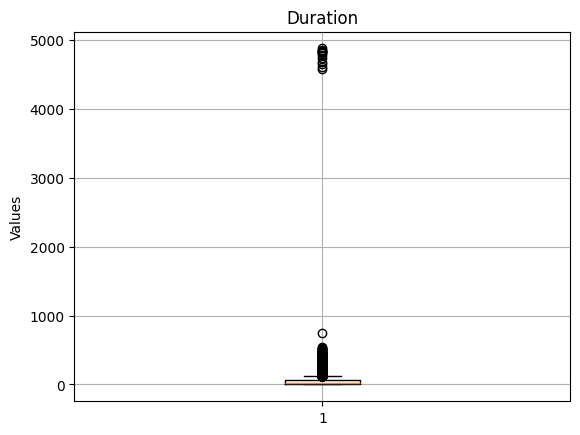

In [39]:
plt.boxplot(Data_1['Duration'])
plt.title('Duration')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### Outlier di Kolom Durasi

Terdapat Extreme Value yang sangat besar dimana terdapat durasi yang lebih dari 360 hari, sehingga harus ditangulangi dengan mendrop data tersebut dan berfokus pada yang durasi perjalanan dibawah 360 hari

In [40]:
Data_2 = Data_1[(Data_1['Duration']<=360)]
Data_2.shape

(38387, 10)

### Anomali di Kolom Durasi

In [41]:
Data_2['Duration'].min()

-1

In [42]:
Data_2[Data_2['Duration']==-1]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0


Terdapat data yang durasinya -1 sehingga data ini harus di drop

In [43]:
Data_2 = Data_2[Data_2['Duration']!=-1]
Data_2.shape

(38385, 10)

## Analyze Age

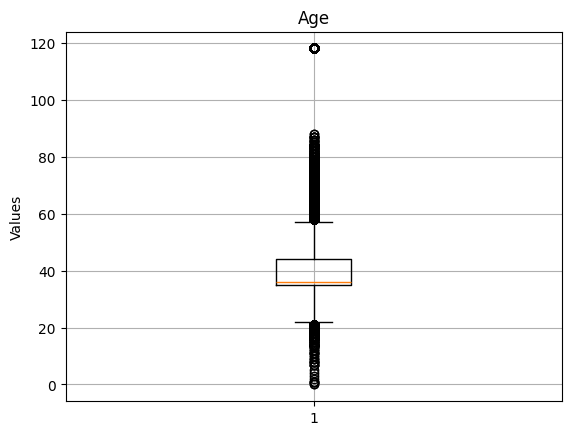

In [44]:
plt.boxplot(Data_2['Age'])
plt.title('Age')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### Outlier di Kolom Age

Terdapat Extreme outlier dimana mayoritas umur di bawah 100, namun terdapat umur yang diatas 100 tahun sehingga harus di drop

In [45]:
Data_3 = Data_2[Data_2['Age']<100]

In [46]:
Data_3.shape

(37908, 10)

## Perbandingan Data

In [47]:
display(Data_3['Claim'].value_counts())
display(Data_3['Claim'].value_counts()/len(Data_3))

Claim
0    37378
1      530
Name: count, dtype: int64

Claim
0    0.986019
1    0.013981
Name: count, dtype: float64

Ditemukan adanya imbanlace data yang sangat besar dengan perbandingan 1/99 maka nanti akan dilakukan resampling

## Data Splitting

### Kolom yang akan digunakan:

Feature:
1. Agency
2. Agency Type
3. Distribution Channel
4. Product Name
5. Duration
6. Destination
7. Age

Target Kolom:   Claim

Kolom 'Net Sales' dan 'Commision (in value)' tidak digunakan karena lebih berfokus kepada agent asuransinya dari pada client nya

In [48]:
X = Data_3.drop(['Claim','Net Sales','Commision (in value)'],axis=1)
y = Data_3['Claim']

In [49]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Age'],
      dtype='object')

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

## Preprocessing

1. One Hot Encoding, Kolom: 'Agency Type','Distribution Channel'
2. Binary Encoding, Kolom: 'Agency','Product Name','Destination'
3. Robust Scaler: 'Duration','Age'

In [115]:
?RandomUnderSampler

Init signature:
RandomUnderSampler(
    *,
    sampling_strategy='auto',
    random_state=None,
    replacement=False,
)
Docstring:     
Class to perform random under-sampling.

Under-sample the majority class(es) by randomly picking samples
with or without replacement.

Read more in the :ref:`User Guide <controlled_under_sampling>`.

Parameters
----------
sampling_strategy : float, str, dict, callable, default='auto'
    Sampling information to sample the data set.

    - When ``float``, it corresponds to the desired ratio of the number of
      samples in the minority class over the number of samples in the
      majority class after resampling. Therefore, the ratio is expressed as
      :math:`\alpha_{us} = N_{m} / N_{rM}` where :math:`N_{m}` is the
      number of samples in the minority class and
      :math:`N_{rM}` is the number of samples in the majority class
      after resampling.

      .. warning::
         ``float`` is only available for **binary** classification. An
    

In [51]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
undersample = RandomUnderSampler(sampling_strategy='auto',random_state=42)
smote = SMOTE(random_state=42)

prepros = ColumnTransformer(transformers=[
    ('One Hot Encoder',OneHotEncoder(),['Agency Type','Distribution Channel']),
    ('Binary Encoder',ce.BinaryEncoder(),['Agency','Product Name','Destination']),
    ('RobustScaler',RobustScaler(),['Duration','Age'])
],remainder='passthrough')

## Modelling

ML Algoritma:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. XGBoost
5. AdaBoost

In [52]:
logreg = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
XGB = XGBClassifier()
ad_classifier = AdaBoostClassifier(n_estimators=100,random_state=42)

### Cross Validation

Metrix yang akan digunakan adalah recall karena kita berfokus kepada keakuratan untuk mendekteksi yang label 1 atau yang menerima claim 

In [53]:
model = [logreg,tree,rf_classifier,XGB,ad_classifier]
skfold = StratifiedKFold(n_splits=5)

score = []
recall = []
std = []


for i in model:
    pipeline = Pipeline([
        ('Preprocessor', prepros),
        ('Resampling',undersample),
        ('Model', i)
        ])
    model_CV = cross_val_score(pipeline,X_train,y_train,cv = skfold, scoring='recall')
    score.append(model_CV)
    recall.append(model_CV.mean())
    std.append(model_CV.std())

dfKfold1 = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','XGB','Ada Boost'],
    'Avg Recall':recall,
    'Std': std
}
)

In [54]:
# Di sini melihat perbandingan Recall antar Algorithm
dfKfold1.sort_values(by='Avg Recall',ascending=False)

,Model,Avg Recall,Std
3,XGB,0.686050,0.063878
2,Random Forest,0.660112,0.062980
4,Ada Boost,0.653249,0.054294
1,Decision Tree,0.620000,0.133186
0,Logistic Regression,0.608291,0.072036


Ditemukan XG Boost  adalah algorithm terbaik dari sisi recall

## HyperTuning Parametric

1. Sebelum Tuning

    Disini akan menguji recall XG Boost Sebelum di tuning

In [64]:
X_GB = Pipeline([
        ('Preprocessor', prepros),
        ('Resampling',undersample),
        ('Model', XGB)
        ])

X_GB.fit(X_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('Binary Encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['Duration', 'Age'])])),
                ('Resampling', RandomUnderSampler(random_state=42)),
                ('Model',
                 XGBC...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [99]:
y_pred = X_GB.predict(X_test)
report_before_tuning = classification_report(y_test,y_pred)
print(report_before_tuning)

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7476
           1       0.03      0.68      0.06       106

    accuracy                           0.69      7582
   macro avg       0.51      0.68      0.43      7582
weighted avg       0.98      0.69      0.80      7582



Nilai recall sebelum tuning adalah 68 %

### Proses tuning

In [94]:
XG_B = XGBClassifier()

tuning_pipe = Pipeline([
    ('Preprocessor', prepros),
    ('Resampling',undersample),
    ('model', XG_B)
])

hyperparam_space = {
    'model__n_estimators': [50,100,150],
    'model__learning_rate': [0.1, 1.0],
    'model__max_depth': np.arange(3,11),
    'model__min_child_weight': np.arange(1,6,2),
    'model__gamma':[i/10.0 for i in range(0,5)],
    'model__subsample':[i/10.0 for i in range(6,10)],
    'model__colsample_bytree':[i/10.0 for i in range(6,10)],
    'model__reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
    
}
skf = StratifiedKFold(n_splits = 5)

grid_search = RandomizedSearchCV(
    tuning_pipe, 
    param_distributions = hyperparam_space, 
    cv = skf,
    n_iter=480,
    scoring = 'recall', 
    n_jobs = -1
)

Hyper Paramater:
1. n_estimator = 50,100,150
2. learning_rate = 0.1, 1
3. max_depth = 3,4,5,6,7,8,9,10
4. min_child_weight = 1,3,5
5. gamma = 0.1 , 0.2 , 0.3 , 0.4
6. subsample = 0.6 , 0.7 , 0.8 , 0.9
7. colsample_bytree = 0.6, 0.7, 0.8, 0.9
8. reg_alpha = 0, 0.001, 0.005, 0.01, 0.05

In [95]:
grid_search.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('Preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Encoder',
                                                                               OneHotEncoder(),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('Binary '
                                                                               'Encoder',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('RobustScaler...
                   param_distributions={'model__colsample_bytree': [0.6, 0.7,
                                                                    0.8, 0.9],
                                        'model__gamma': [0.0, 0.1, 0.2, 0.3,
                                                         0.4],
                                        'model__learning_rate': [0.1, 1.0],
                                        'model__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'model__min_child_weight': array([1, 3, 5]),
                                        'model__n_estimators': [50, 100, 150],
                                        'model__reg_alpha': [0, 0.001, 0.005,
                                                             0.01, 0.05],
                                        'model__subsample': [0.6, 0.7, 0.8,
                                                             0.9]},
                   scoring='recall')

In [96]:
# The Best Paramater
print(grid_search.best_score_)
grid_search.best_params_

0.7356862745098038


{'model__subsample': 0.8,
 'model__reg_alpha': 0.001,
 'model__n_estimators': 150,
 'model__min_child_weight': 5,
 'model__max_depth': 4,
 'model__learning_rate': 0.1,
 'model__gamma': 0.1,
 'model__colsample_bytree': 0.9}

### Test
-----------------

In [110]:
X_GB = Pipeline([
        ('Preprocessor', prepros),
        ('Resampling',undersample),
        ('Model', XGBClassifier(subsample=0.8,reg_alpha= 0.001,n_estimators =  150, min_child_weight = 5,max_depth = 4,learning_rate =  0.1,gamma =  0.1,colsample_bytree = 0.9))
        ])

X_GB.fit(X_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('Binary Encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['Duration', 'Age'])])),
                ('Resampling', RandomUnderSampler(random_state=42)),
                ('Model',
                 XGBC...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [111]:
y_pred = X_GB.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      7476
           1       0.03      0.72      0.06       106

    accuracy                           0.71      7582
   macro avg       0.51      0.71      0.45      7582
weighted avg       0.98      0.71      0.82      7582



In [114]:
# Nilai Recall
recall_score(y_test,y_pred)

0.7169811320754716

### Kesimpulan

Machine Learning Terbaik untuk mendeteksi client yang mengclaim asuransi adalah XG Boost.  

Paramater terbaik untuk XG Boost Boost:
1. model__subsample: 0.8
2. model__reg_alpha: 0.001
3. model__n_estimators: 150
4. model__min_child_weight: 5
5. model__max_depth: 4
6. model__learning_rate: 0.1
7. model__gamma: 0.
8 model__colsample_bytree: 0.9

Recall untuk data test didapatkan: 72%